In [1]:
import torch
from torch import nn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(torch.__version__)

2.2.1+cu121


## Make Classification Data

In [2]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=36)
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[-0.51616097 -0.80448756]
 [ 0.21437768 -0.7292871 ]
 [ 0.52268172 -0.61083988]
 [-0.92241222  0.44613843]
 [-0.25736324 -0.70654505]]
First 5 samples of y:
 [0 1 1 0 1]


In [4]:
# Make DataFrame of circle data
circles = pd.DataFrame({
    "X_1": X[:, 0],
    "X_2": X[:, 1],
    "label": y
})
circles.head(10)

,X_1,X_2,label
0,-0.516161,-0.804488,0
1,0.214378,-0.729287,1
2,0.522682,-0.610840,1
3,-0.922412,0.446138,0
4,-0.257363,-0.706545,1
5,0.078599,-0.755956,1
6,-0.065401,-0.975706,0
7,-0.502730,0.653031,1
8,-0.794530,-0.102092,1
9,-0.152934,-1.025184,0


In [5]:
circles.label.value_counts()

0    500
1    500
Name: label, dtype: int64

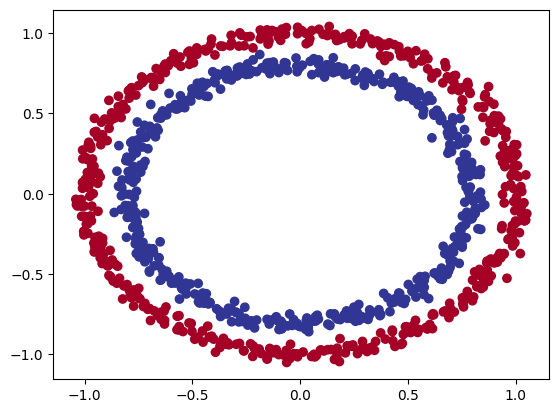

In [6]:
# Visualize
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### Shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X

array([[-0.51616097, -0.80448756],
       [ 0.21437768, -0.7292871 ],
       [ 0.52268172, -0.61083988],
       ...,
       [ 0.47193053, -0.66317014],
       [ 0.12211491,  0.80297944],
       [-0.20310922,  0.76032911]])

In [9]:
# View the first sample of features & labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.51616097 -0.80448756] and the same for y: 0
Shapes for one sample of X: (2,) and the same for y: ()


### Tensors

In [10]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [11]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-0.5162, -0.8045],
         [ 0.2144, -0.7293],
         [ 0.5227, -0.6108],
         [-0.9224,  0.4461],
         [-0.2574, -0.7065]]),
 tensor([0., 1., 1., 0., 1.]))

In [12]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

### Train & Test Splits

In [13]:
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=36)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [15]:
n_samples

1000

## Build the Model

In [16]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [17]:
X_train

tensor([[ 0.2652, -0.9949],
        [ 0.7793, -0.1630],
        [-0.6993, -0.7144],
        ...,
        [-1.0087,  0.2179],
        [ 0.7199,  0.7370],
        [ 0.9776,  0.1132]])

In [18]:
X_train.shape

torch.Size([800, 2])

In [19]:
y_train[:5]

tensor([0., 1., 0., 1., 1.])

In [20]:
# [1] Construct a model that subclasses `nn.module`
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # [2] Create 2 `nn.Linear` layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # [3] Define a `forward()` method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

# [4] Instantiate an instance of the model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
device

'cpu'

In [22]:
next(model_0.parameters()).device

device(type='cpu')

In [23]:
# Replicate the model using `nn.Sequential()`
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1941, -0.5561],
                      [ 0.3912, -0.0075],
                      [ 0.4059, -0.5262],
                      [ 0.4890, -0.3234],
                      [ 0.3221,  0.2091]])),
             ('0.bias', tensor([0.6246, 0.4656, 0.0427, 0.1970, 0.0805])),
             ('1.weight',
              tensor([[ 0.3999, -0.3503,  0.0760,  0.1399,  0.3803]])),
             ('1.bias', tensor([0.1770]))])

In [25]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

First 10 labels:
tensor([1., 0., 1., 0., 0., 1., 1., 0., 1., 1.])


In [26]:
X_test[:10], y_test[:10]

(tensor([[-0.7519, -0.2348],
         [ 0.0672, -1.0155],
         [ 0.8382, -0.0326],
         [ 0.9453, -0.3723],
         [ 0.0867,  1.0243],
         [-0.7047, -0.4041],
         [ 0.8015,  0.1478],
         [-0.9936,  0.2249],
         [ 0.1271,  0.7600],
         [-0.6808, -0.3660]]),
 tensor([1., 0., 1., 0., 0., 1., 1., 0., 1., 1.]))

### Setup Loss Function & Optimizer

In [27]:
# Setup the loss function
# loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss()

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [28]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## Training
### Raw Logits, Prediction Probabilities & Prediction Labels

In [29]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.2561],
        [0.5651],
        [0.4686],
        [0.5627],
        [0.1083]])

In [30]:
y_test[:5]

tensor([1., 0., 1., 0., 0.])

In [31]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5637],
        [0.6376],
        [0.6151],
        [0.6371],
        [0.5270]])

In [32]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

### Training & Testing Loop

In [33]:
torch.manual_seed(36)
torch.cuda.manual_seed(36)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training & evaluation loop
for epoch in range(epochs):
  # Training
  model_0.train()

  # [1] Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # [2] Calculate loss/acc
  # `nn.BCELoss` expects prediction probabilities as input
  # loss = loss_fn(torch.sigmoid(y_logits), y_train)
  # `nn.BCEWithLogitsLoss` expects raw logits as input
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # [3] Optimizer zero grad
  optimizer.zero_grad()

  # [4] Loss backward (backpropagation)
  loss.backward()

  # [5] Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # [1] Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # [2] Calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc}%")

Epoch: 0 | Loss: 0.70609, Acc: 49.88% | Test loss: 0.72462, Test acc: 50.5%
Epoch: 10 | Loss: 0.69665, Acc: 59.38% | Test loss: 0.71290, Test acc: 56.00000000000001%
Epoch: 20 | Loss: 0.69350, Acc: 54.37% | Test loss: 0.70828, Test acc: 44.5%
Epoch: 30 | Loss: 0.69244, Acc: 53.75% | Test loss: 0.70634, Test acc: 42.5%
Epoch: 40 | Loss: 0.69207, Acc: 53.12% | Test loss: 0.70550, Test acc: 41.5%
Epoch: 50 | Loss: 0.69194, Acc: 52.75% | Test loss: 0.70512, Test acc: 41.0%
Epoch: 60 | Loss: 0.69189, Acc: 52.75% | Test loss: 0.70496, Test acc: 40.0%
Epoch: 70 | Loss: 0.69187, Acc: 52.50% | Test loss: 0.70491, Test acc: 39.5%
Epoch: 80 | Loss: 0.69185, Acc: 52.62% | Test loss: 0.70491, Test acc: 39.0%
Epoch: 90 | Loss: 0.69184, Acc: 52.62% | Test loss: 0.70493, Test acc: 39.0%


## Make Predictions & Evaluate the Model

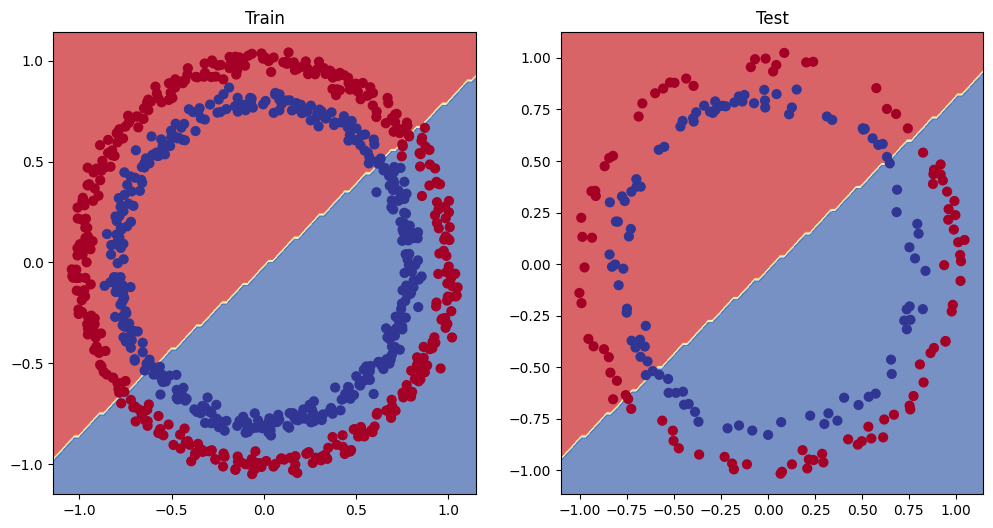

In [34]:
# Plot decision boundaries of model predicting on X in comparison to y
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
  # Put everything to CPU for working better with NumPy & Matplotlib
  model.to("cpu")
  X, y = X.to("cpu"), y.to("cpu")

  # Setup prediction boundaries & grid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

  # Make features
  X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

  # Make predictions
  model.eval()
  with torch.inference_mode():
    y_logits = model(X_to_pred_on)

  # Test for multi-class or binary and adjust logits to prediction labels
  if len(torch.unique(y)) > 2:
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
  else:
    y_pred = torch.round(torch.sigmoid(y_logits))  # binary

  # Reshape preds and plot
  y_pred = y_pred.reshape(xx.shape).detach().numpy()
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)